# Customer Segmentation Analysis with Python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the required libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

### Importing the Dataset

In [109]:
df = pd.read_csv('/content/drive/MyDrive/Internship/Internsavy/Customer Segmentation Analysis/Mall_Customers.csv')

In [110]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [111]:
df1 = df.copy()

### Checking null values

In [116]:
df1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Remove Duplicates

In [117]:
df1 = df1.drop_duplicates()

In [118]:
df1.shape

(200, 5)

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [120]:
df1['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Encoding the categorical data

In [121]:
df1['Gender'] = df1['Gender'].map({'Male':1, 'Female':0})

In [122]:
df1.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [123]:
df1.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


### Checking the Outliers

In [124]:
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3 - q1

((df1<(q1-(1.5*iqr)))|(df1>(q3+(1.5*iqr)))).sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64

In [125]:
df2 = df1.drop('CustomerID', axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ce18f75ff10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ce18f628820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ce18f75fc70>],
 'medians': [<matplotlib.lines.Line2D at 0x7ce18f629fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ce18f62a680>],
 'means': []}

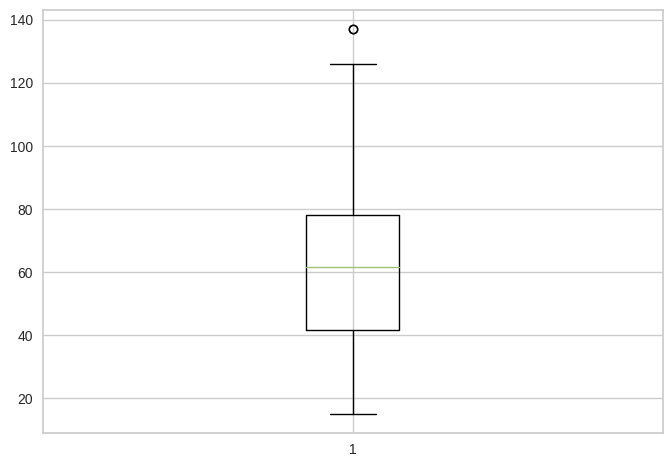

In [126]:
plt.boxplot(data=df2, x='Annual Income (k$)')

In [127]:
q1, q3

(CustomerID                50.75
 Gender                     0.00
 Age                       28.75
 Annual Income (k$)        41.50
 Spending Score (1-100)    34.75
 Name: 0.25, dtype: float64,
 CustomerID                150.25
 Gender                      1.00
 Age                        49.00
 Annual Income (k$)         78.00
 Spending Score (1-100)     73.00
 Name: 0.75, dtype: float64)

In [128]:
lt = q1-(1.5*iqr)
ht = q3+(1.5*iqr)

print(lt, ht)

CustomerID               -98.500
Gender                    -1.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64 CustomerID                299.500
Gender                      2.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64


In [129]:
print(sorted(df2.iloc[:,2].values))

[15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 23, 23, 24, 24, 25, 25, 28, 28, 28, 28, 29, 29, 30, 30, 33, 33, 33, 33, 34, 34, 37, 37, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46, 47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60, 60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64, 64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 69, 70, 70, 71, 71, 71, 71, 71, 71, 72, 72, 73, 73, 73, 73, 74, 74, 75, 75, 76, 76, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 81, 81, 85, 85, 86, 86, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 93, 93, 97, 97, 98, 98, 99, 99, 101, 101, 103, 103, 103, 103, 113, 113, 120, 120, 126, 126, 137, 137]


### In here, we clip the outliers

In [130]:
df2['Annual Income (k$)'] = df2['Annual Income (k$)'].clip(41.5, 126)

In [131]:
q1 = df2.quantile(0.25)
q3 = df2.quantile(0.75)
iqr = q3 - q1

((df2<(q1-(1.5*iqr)))|(df2>(q3+(1.5*iqr)))).sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ce18f6e3640>,
 'caps': [<matplotlib.lines.Line2D at 0x7ce18f6e3b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ce18f6e33a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ce18f694100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ce18f6943a0>],
 'means': []}

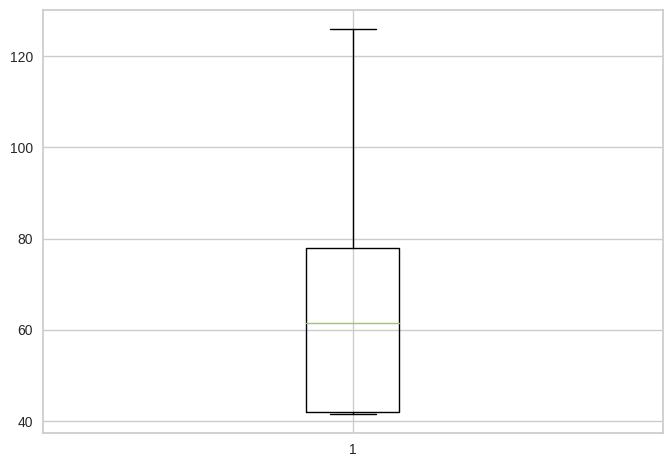

In [132]:
plt.boxplot(data=df2, x='Annual Income (k$)')

### Scalling the Data

### Because, it deals with distance

In [182]:
ss = StandardScaler()

x_std = ss.fit_transform(df2)
x_std

array([[ 1.12815215e+00, -1.42456879e+00, -1.05032324e+00,
        -4.34801480e-01],
       [ 1.12815215e+00, -1.28103541e+00, -1.05032324e+00,
         1.19570407e+00],
       [-8.86405260e-01, -1.35280210e+00, -1.05032324e+00,
        -1.71591298e+00],
       [-8.86405260e-01, -1.13750203e+00, -1.05032324e+00,
         1.04041783e+00],
       [-8.86405260e-01, -5.63368514e-01, -1.05032324e+00,
        -3.95979919e-01],
       [-8.86405260e-01, -1.20926872e+00, -1.05032324e+00,
         1.00159627e+00],
       [-8.86405260e-01, -2.76301755e-01, -1.05032324e+00,
        -1.71591298e+00],
       [-8.86405260e-01, -1.13750203e+00, -1.05032324e+00,
         1.70038436e+00],
       [ 1.12815215e+00,  1.80493225e+00, -1.05032324e+00,
        -1.83237767e+00],
       [-8.86405260e-01, -6.35135204e-01, -1.05032324e+00,
         8.46310024e-01],
       [ 1.12815215e+00,  2.02023231e+00, -1.05032324e+00,
        -1.40534050e+00],
       [-8.86405260e-01, -2.76301755e-01, -1.05032324e+00,
      

## Building the Model

In [183]:
km = KMeans(n_clusters=2)
km.fit(x_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [184]:
centeroids = km.cluster_centers_
centeroids

array([[ 0.05241761,  0.70892251, -0.03149938, -0.69939115],
       [-0.05565994, -0.75277339,  0.03344779,  0.74265245]])

In [185]:
km.labels_

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [186]:
km.inertia_

588.5932612696133

### Using Elbow method

In [187]:
inertias = []
lists_k = list(range(1, 11))

for k in lists_k:
  km1 = KMeans(n_clusters = k)
  km1.fit(x_std)
  cluster_labels = km1.predict(x_std)
  inertias.append(km1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

## Visualize the Elbow Method

Text(0, 0.5, 'Inertia')

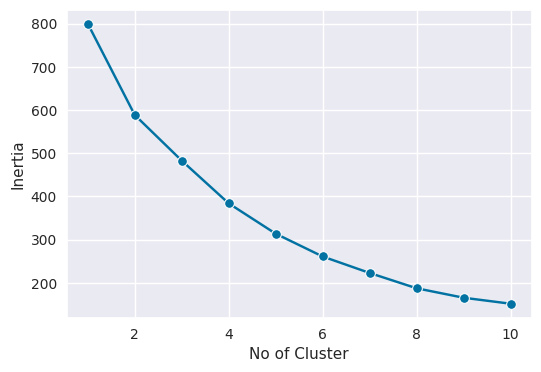

In [188]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))
sns.lineplot(x=lists_k, y=inertias, marker='o')
plt.xlabel('No of Cluster')
plt.ylabel('Inertia')
#plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

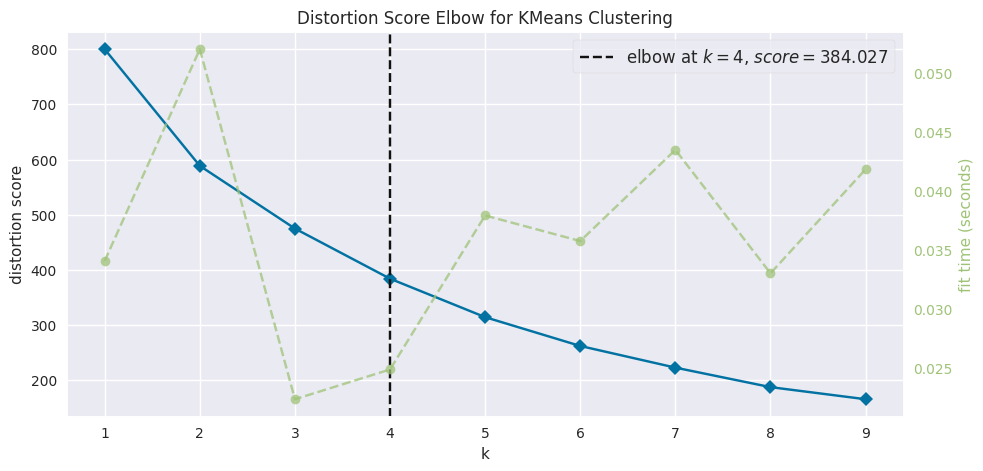

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [189]:
visualizer1 = KElbowVisualizer(km1, k=(1,10),size=(1080, 500))

visualizer1.fit(x_std)        # Fit the data to the visualizer
visualizer1.show()

### Evaluation Score


In [153]:
print('Silhouette Score: ', silhouette_score(x_std, cluster_labels))

Silhouette Score:  0.40573467174999706


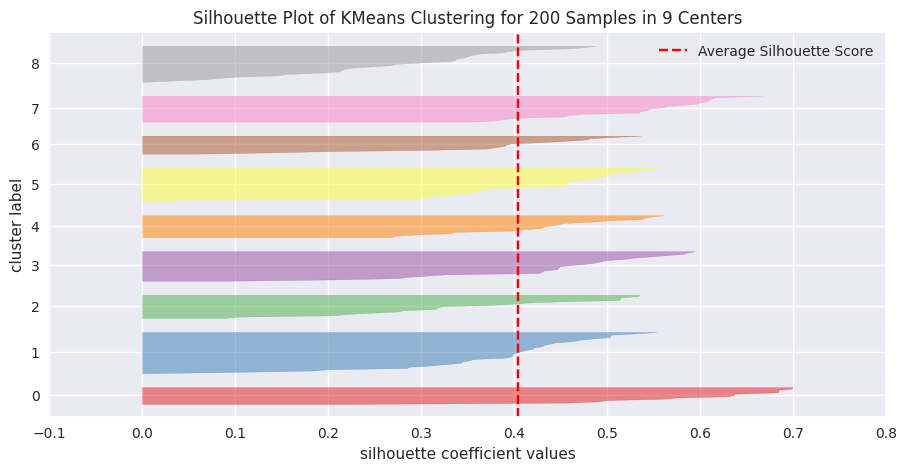

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [154]:
visualizer = SilhouetteVisualizer(km1, size=(1080,500))
visualizer.fit(x_std)
visualizer.show()

### Using Principle Component Analysis (PCA)

In [166]:
pca = PCA(n_components=2)

df3 = pd.DataFrame(pca.fit_transform(x_std), columns=['PCA1', 'PCA2'])


In [167]:
df3

,PCA1,PCA2
0,-0.325265,0.088194
1,-1.335570,0.048744
2,0.166283,-1.217136
3,-1.560513,-1.281332
4,-0.186240,-1.310478
...,...,...
195,-1.447094,1.390071
196,0.363437,1.566903
197,-1.066794,2.942625
198,0.412561,2.977770


In [168]:
df3.columns

Index(['PCA1', 'PCA2'], dtype='object')

In [169]:
a1 = km1.cluster_centers_

In [170]:
reduce_centers = pca.fit_transform(a1)
reduce_centers

array([[ 1.88589151, -0.25350699],
       [-0.20576405, -1.22744597],
       [-1.76849115,  0.50342898],
       [ 0.48352346,  1.3271549 ],
       [ 0.28023984,  1.5524836 ],
       [-1.32998038,  0.44117075],
       [-1.05923965, -1.30145969],
       [ 1.11921419, -0.25405531],
       [ 0.59460623, -0.78777028]])

In [171]:
df3['Cluster Labels'] = cluster_labels

In [172]:
df3

,PCA1,PCA2,Cluster Labels
0,-0.325265,0.088194,4
1,-1.335570,0.048744,4
2,0.166283,-1.217136,1
3,-1.560513,-1.281332,8
4,-0.186240,-1.310478,1
...,...,...,...
195,-1.447094,1.390071,5
196,0.363437,1.566903,9
197,-1.066794,2.942625,2
198,0.412561,2.977770,3


### Visualize the Cluster Data

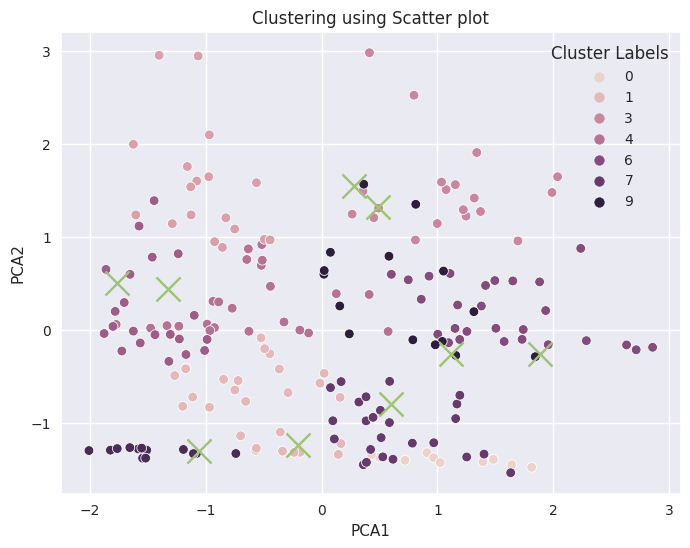

In [173]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.scatterplot(data=df3, x='PCA1', y='PCA2', hue='Cluster Labels')
plt.scatter(reduce_centers[:,0],reduce_centers[:,1], marker='x',s=300)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering using Scatter plot')
plt.show()

### Visualize the Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

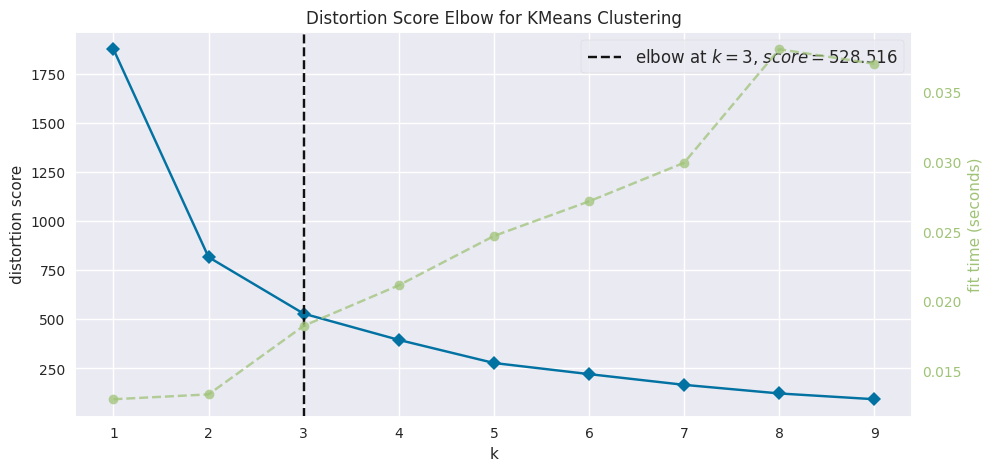

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [174]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(df3.iloc[:,:3])        # Fit the data to the visualizer
visualizer.show()

## Evaluation with Euclidean method

In [175]:
print('Silhoette Score: ', silhouette_score(df3, km1.labels_, metric='euclidean'))

Silhoette Score:  0.48608697885690694


### Visualize the score

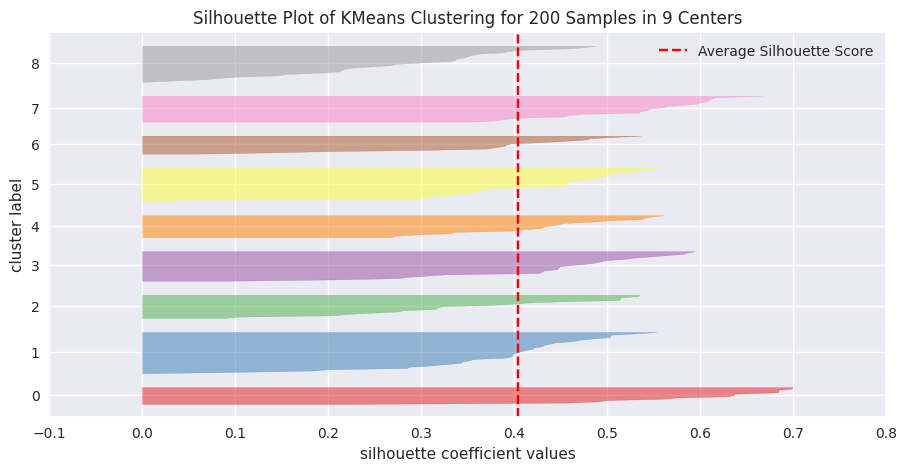

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [176]:
visual = SilhouetteVisualizer(km1, size= (1080, 500))
visual.fit(x_std)
visual.show()